<a href="https://colab.research.google.com/github/trewto/Enviroment_Study/blob/main/ipta_slope_analysis_method_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/research/Rainfall_1981-2022.xls', header=0)

In [23]:
# Convert day columns (1 to 31) to numeric, forcing errors to NaN
df.loc[:, 1:31] = df.loc[:, 1:31].apply(pd.to_numeric, errors='coerce')
#if needed remove this later// which will be proper way to handle the missing value
#df.loc[:, 1:31] = df.loc[:, 1:31].fillna(df.loc[:, 1:31].mean(axis=1), axis=0)

# Sum the columns from 1 to 31 row-wise, ignoring NaN values
df['sum_1_to_31'] = df.loc[:, 1:31].sum(axis=1)

In [24]:
df.head()


,Stati,Year,Month,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,sum_1_to_31
0,Dhaka,1981,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0
1,Dhaka,1981,2,9.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,42.0
2,Dhaka,1981,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,13.0,0.0,8.0,0.0,2.0,0.0,109.0
3,Dhaka,1981,4,41.0,2.0,0.0,0.0,4.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,274.0
4,Dhaka,1981,5,0.0,0.0,0.0,0.0,20.0,8.0,0.0,...,0.0,0.0,13.0,1.0,1.0,1.0,43.0,45.0,0.0,272.0


In [25]:
print(df['Stati'].unique())

['Dhaka       ' nan
 '          Daily  total  Rainfall  data  in  Millimeter  ' 'Stati'
 'Tangail     ' 'Mymensingh  ' 'Faridpur    ' 'Madaripur   '
 'Srimangal   ' 'Sylhet      ' 'Bogra       ' 'Dinajpur    '
 'Ishurdi     ' 'Rajshahi    ' 'Rangpur     ' 'sydpur      '
 'chuadanga   ' 'Jessore     ' 'Khulna      ' 'Mongla      '
 'Satkhira    ' 'Barisal     ' 'Bhola       ' 'Khepupara   '
 'Patuakhali  ' 'Chandpur    ' 'Teknaf      ' 'Chittagong  '
 'Comilla     ' "Cox'sbazar  " "Cox's Bazar " 'Feni        '
 'Hatiya      ' 'Kutubdia    ' 'M.court     ' 'Rangamati   '
 'Sandwip     ' 'Ambagan(Ctg)' 'Sitakunda   ']


In [26]:
df_city = df[df['Stati'] == 'Faridpur    ']
df_city = df_city[['Year', 'Month', 'sum_1_to_31']]
df_city.head(20)

,Year,Month,sum_1_to_31
1518,1981,1,10.0
1519,1981,2,58.0
1520,1981,3,140.0
1521,1981,4,357.0
1522,1981,5,263.0
1523,1981,6,283.0
1524,1981,7,422.0
1525,1981,8,740.0
1526,1981,9,199.0
1527,1981,10,35.0


In [33]:
# prompt: get all row from df_city  Where Month =1 , and devide it two part the first half and last half

dataset = []
# Filter rows where Month is 1
for i in range(1,13):
  df_month = df_city[df_city['Month'] == i]

  # Calculate the midpoint of the filtered DataFrame
  midpoint = len(df_month) // 2

  # Split the DataFrame into two parts
  first_half = df_month.iloc[:midpoint]
  last_half = df_month.iloc[midpoint:]

  #print("First Half:")
  #print(first_half)
  sum_first_half = first_half['sum_1_to_31'].sum()

  sum_first_half = first_half['sum_1_to_31'].mean()

  std_first_half = first_half['sum_1_to_31'].std()
  #print(f"The sum of 'sum_1_to_31' for the first half is: {sum_first_half}")

  #print("\nLast Half:")
  #print(last_half)
  sum_last_half = last_half['sum_1_to_31'].sum()
  sum_last_half = last_half['sum_1_to_31'].mean()
  std_last_half = last_half['sum_1_to_31'].std()
  #print(f"The sum of 'sum_1_to_31' for the last half is: {sum_last_half}")
  dataset.append([i, sum_first_half, sum_last_half,std_first_half,std_last_half])






In [40]:
# prompt: what if a want to give a collam name to dataset

import pandas as pd

# Assuming 'dataset' is already defined as in the preceding code

df_dataset = pd.DataFrame(dataset, columns=['Month', 'Sum_First_Half', 'Sum_Last_Half','std_First_Half','std_Last_Half'])
print(df_dataset)


    Month  Sum_First_Half  Sum_Last_Half  std_First_Half  std_Last_Half
0       1        7.238095       6.714286       11.797901      11.866520
1       2       26.428571      20.523810       22.714690      32.194128
2       3       55.714286      26.809524       56.793611      38.488465
3       4      139.285714      80.952381       71.342934      59.568008
4       5      264.095238     186.380952       98.381352      82.671928
5       6      316.952381     293.952381      148.363229     105.066872
6       7      308.238095     401.523810       90.973021     202.693024
7       8      315.380952     297.904762      147.613169     170.042908
8       9      265.047619     232.476190      166.206040     188.042979
9      10      162.571429     136.761905      119.949811      92.736134
10     11       38.333333      36.714286       51.740055      69.524918
11     12       13.523810      15.809524       29.066508      39.421592


Plot Rainfall Mean


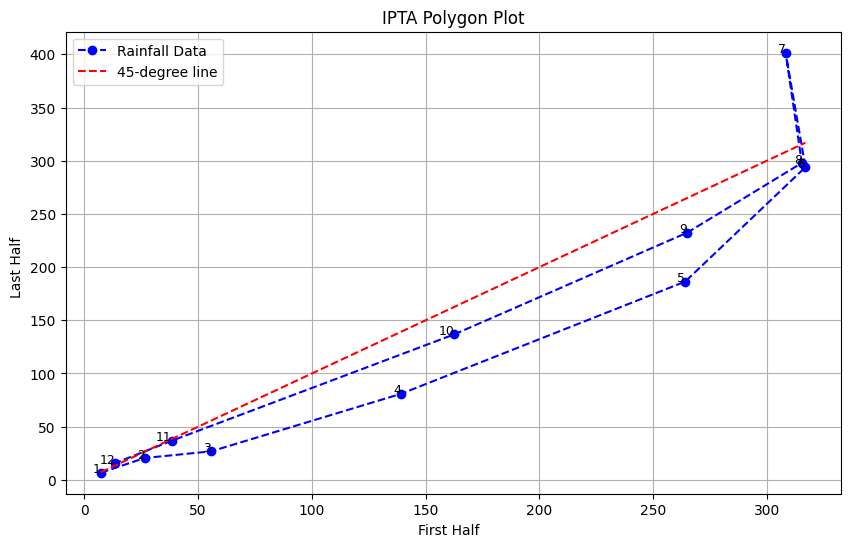

    Month  Sum_First_Half  Sum_Last_Half     Slopes      Length
0       1        7.238095       6.714286   0.719603   23.642701
1       2       26.428571      20.523810   0.214634   29.952684
2       3       55.714286      26.809524   0.647863   99.577270
3       4      139.285714      80.952381   0.844716  163.378704
4       5      264.095238     186.380952   2.035135  119.856121
5       6      316.952381     293.952381 -12.344262  107.923820
6       7      308.238095     401.523810 -14.506667  103.864948
7       8      315.380952     297.904762   1.299905   82.549030
8       9      265.047619     232.476190   0.934015  140.223372
9      10      162.571429     136.761905   0.805289  159.513731
10     11       38.333333      36.714286   0.842610   32.442588
11     12       13.523810      15.809524   1.446970   11.055929
Plot Rainfall std


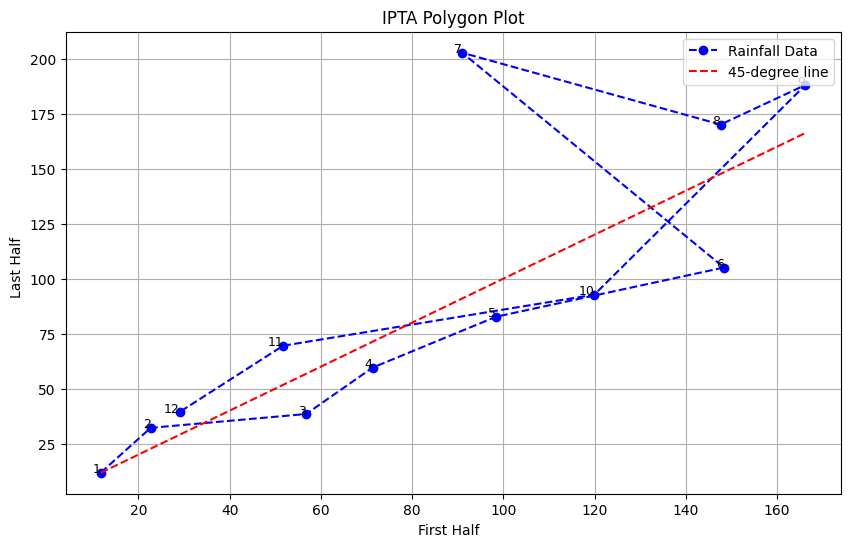

    Month  Sum_First_Half  Sum_Last_Half    Slopes      Length
0       1       11.797901      11.866520  1.862050   23.073534
1       2       22.714690      32.194128  0.184699   34.655325
2       3       56.793611      38.488465  1.448833   25.613082
3       4       71.342934      59.568008  0.854485   35.564971
4       5       98.381352      82.671928  0.448061   54.769713
5       6      148.363229     105.066872 -1.701094  113.245315
6       7       90.973021     202.693024 -0.576448   65.376880
7       8      147.613169     170.042908  0.968117   25.878512
8       9      166.206040     188.042979  2.060411  105.938819
9      10      119.949811      92.736134  0.340292   72.050894
10     11       51.740055      69.524918  1.327685   37.686868
11     12       29.066508      39.421592  1.595674   32.519022


In [42]:
import matplotlib.pyplot as plt

# Function to calculate slope between two points
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:
        return (y2 - y1) / (x2 - x1)
    else:
        return 0

def calculate_length(x1, y1, x2, y2):
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5



# Function to calculate slopes and plot IPTA
def plot_ipta(Month,data_first, data_last):
    #data_first_1 will be in first collam Name Sum_First_Half and data_last one will be in second collam and merged
    df = pd.concat([Month,data_first, data_last], axis=1)
    df.columns = ['Month','Sum_First_Half', 'Sum_Last_Half']

    # Calculate slopes and lengths
    slopes = []
    lengths= []


    for i in range(len(df)):



        if i ==  len(df) -1 :
          x1, y1 = df['Sum_First_Half'].iloc[i], df['Sum_Last_Half'].iloc[i]
          x2, y2 = df['Sum_First_Half'].iloc[0], df['Sum_Last_Half'].iloc[0]
          slope = calculate_slope(x1, y1, x2, y2)
          length  = calculate_length(x1, y1, x2, y2)

          slopes.append(slope)
          lengths.append(length)



        else:
          x1, y1 = df['Sum_First_Half'].iloc[i], df['Sum_Last_Half'].iloc[i]
          x2, y2 = df['Sum_First_Half'].iloc[i + 1], df['Sum_Last_Half'].iloc[i + 1]
          slope = calculate_slope(x1, y1, x2, y2)
          length  = calculate_length(x1, y1, x2, y2)
          slopes.append(slope)
          lengths.append(length)

    # Add None for the first slope (no previous point)
    #slopes = [None] + slopes
    slopes = slopes

    # Add slopes to the DataFrame
    df['Slopes'] = slopes
    df['Length'] = lengths

    # Plot IPTA
    plt.figure(figsize=(10, 6))
    plt.plot(df['Sum_First_Half'], df['Sum_Last_Half'], marker='o', linestyle='--', color='b', label='Rainfall Data')

    # Plot month names beside each point
    for i in range(len(df)):
        plt.text(df['Sum_First_Half'].iloc[i], df['Sum_Last_Half'].iloc[i],
                 f"{df['Month'].iloc[i]}", fontsize=9, ha='right')

    # Plot slopes
    #for i in range(len(df) - 1):
    #    plt.text((df['Sum_First_Half'].iloc[i] + df['Sum_First_Half'].iloc[i + 1]) / 2,
    #              (df['Sum_Last_Half'].iloc[i] + df['Sum_Last_Half'].iloc[i + 1]) / 2,
     #             f"Slope: {round(slopes[i + 1], 2)}", fontsize=9, color='green')

    # Plot 45-degree reference line
    plt.plot([df['Sum_First_Half'].min(), df['Sum_First_Half'].max()],
             [df['Sum_First_Half'].min(), df['Sum_First_Half'].max()],
             'r--', label='45-degree line')

    plt.title('IPTA Polygon Plot')
    plt.xlabel('First Half  ')
    plt.ylabel('Last Half  ')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(df)

# Example usage
# Assuming df_dataset is your DataFrame
print( "Plot Rainfall Mean")
plot_ipta(df_dataset['Month'],df_dataset['Sum_First_Half'],df_dataset['Sum_Last_Half'])



print( "Plot Rainfall std")
plot_ipta(df_dataset['Month'],df_dataset['std_First_Half'],df_dataset['std_Last_Half'])
